<a href="https://colab.research.google.com/github/Ch256981/IMLP347/blob/main/20240327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# reads only data and target from the OpenML Bank Marketing Dataset
data, target = fetch_openml(data_id=1461, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# EDA on features/data/input-variables/input-fields/independent-variables
print(f'type = {type(data)}')
print(f'info = {type(data.info())}')
print(f'size = {data.size}')
print(f'shape = {data.shape}')
print(f'isna = {data.isna().sum()}')
print(f'items = {data.items}')
print(f'values = {data.values}')
data.describe()

type = <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  float64 
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  float64 
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  float64 
 10  V11     45211 non-null  category
 11  V12     45211 non-null  float64 
 12  V13     45211 non-null  float64 
 13  V14     45211 non-null  float64 
 14  V15     45211 non-null  float64 
 15  V16     45211 non-null  category
dtypes: category(9), float64(7)
memory usage: 2.8 MB
info = <class 'NoneType'>
size = 723376
shape = (45211, 16)
isna = V1     0
V2     0
V3     0
V4     0
V5    

,V1,V6,V10,V12,V13,V14,V15
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# report correlations
data.corr()

<ipython-input-4-18ab5e1faf56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,V1,V6,V10,V12,V13,V14,V15
V1,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
V6,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
V10,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
V12,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
V13,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
V14,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
V15,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<ipython-input-6-2241b5fedb4c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_map = heatmap(data.corr(), annot=True, cmap='rainbow')


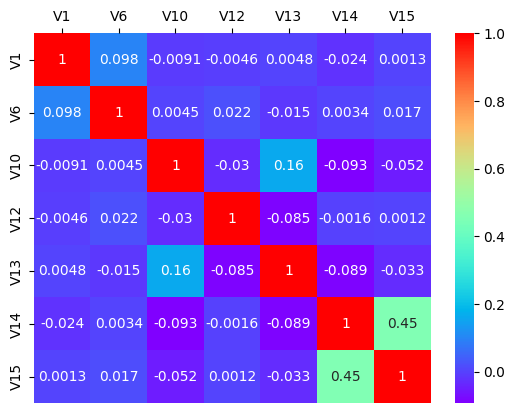

In [6]:
# report correlations
from seaborn import heatmap
corr_map = heatmap(data.corr(), annot=True, cmap='rainbow')
corr_map.xaxis.tick_top()

## Data Preparation

In [7]:
# split training and testing dataset
import numpy as np
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data.select_dtypes(np.number), target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

((33908, 7), (11303, 7), (33908,), (11303,))

## *Classification* Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data_train, target_train)
print(f'training score = {knn.score(data_train, target_train)}')
print(f'testing score = {knn.score(data_test, target_test)}')

training score = 1.0
testing score = 0.8537556400955498


In [12]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data_train, target_train)
print(f'training score = {knn.score(data_train, target_train)}')
print(f'testing score = {knn.score(data_test, target_test)}')

training score = 0.9220243010498997
testing score = 0.8797664336901707


In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_train, target_train)
print(f'training score = {knn.score(data_train, target_train)}')
print(f'testing score = {knn.score(data_test, target_test)}')

training score = 0.9244131178482954
testing score = 0.8758736618596833


In [17]:
np.array(target)

array(['1', '1', '1', ..., '2', '1', '1'], dtype=object)

In [18]:
pred = knn.predict(data.select_dtypes(np.number))

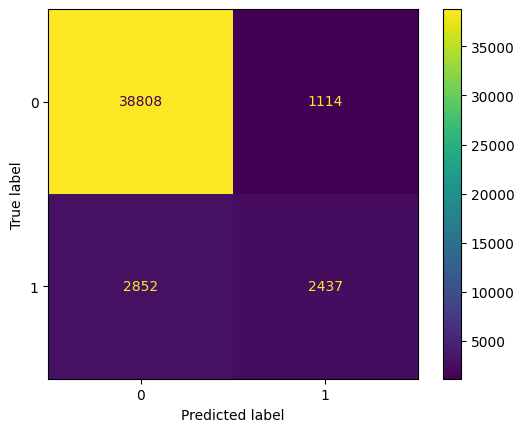

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target, pred)
ConfusionMatrixDisplay(cm).plot()

## Dummy Variables

In [32]:
import pandas as pd
pd.get_dummies(data, drop_first=True).describe()

,V1,V6,V10,V12,V13,V14,V15,V2_blue-collar,V2_entrepreneur,V2_housemaid,...,V11_jul,V11_jun,V11_mar,V11_may,V11_nov,V11_oct,V11_sep,V16_other,V16_success,V16_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.032890,0.027427,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.178351,0.163326,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
pd.get_dummies(data.V7, drop_first=True)

,yes
0,1
1,1
2,1
3,1
4,0
...,...
45206,0
45207,0
45208,0
45209,0


In [29]:
pd.get_dummies(data.V4).corr()

,primary,secondary,tertiary,unknown
primary,1.000000,-0.433911,-0.272845,-0.087464
secondary,-0.433911,1.000000,-0.662890,-0.212498
tertiary,-0.272845,-0.662890,1.000000,-0.133620
unknown,-0.087464,-0.212498,-0.133620,1.000000


In [31]:
pd.get_dummies(data.V4, drop_first=True)

,secondary,tertiary,unknown
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
45206,0,1,0
45207,0,0,0
45208,1,0,0
45209,1,0,0


## Transformation

### standardization : mean = 0 and std = 1.0

### normalization : range between [0,1] or [-1,+1]

* scaling
* shifting or centering
* (rarely in business) rotation



In [35]:
df = pd.DataFrame({'Width' : [99.9, 66.6, 33.3], 'Height' : [5.5, 9.9, 1.1], 'Depth' : [0., .5, 1.]})
df

,Width,Height,Depth
0,99.9,5.5,0.0
1,66.6,9.9,0.5
2,33.3,1.1,1.0


In [48]:
# standardization : mean = 0 and std = 1.0
(df - df.mean()) / df.std()

,Width,Height,Depth
0,1.000000e+00,0.0,-1.0
1,-4.267524e-16,1.0,0.0
2,-1.000000e+00,-1.0,1.0


In [41]:
# scaling : [0,1]
# centering : [-1,1]
df / df.abs().max()

,Width,Height,Depth
0,1.000000,0.555556,0.0
1,0.666667,1.000000,0.5
2,0.333333,0.111111,1.0


In [44]:
# normalization : [0,1]
(df - df.min()) / (df.max() - df.min()) # do not see in the interview

,Width,Height,Depth
0,1.0,0.5,0.0
1,0.5,1.0,0.5
2,0.0,0.0,1.0


In [45]:
from sklearn import preprocessing
preprocessing.StandardScaler().fit_transform(df)

array([[ 1.22474487e+00,  0.00000000e+00, -1.22474487e+00],
       [-5.22662806e-16,  1.22474487e+00,  0.00000000e+00],
       [-1.22474487e+00, -1.22474487e+00,  1.22474487e+00]])

In [47]:
(df - df.mean()) / df.std()

,Width,Height,Depth
0,1.000000e+00,0.0,-1.0
1,-4.267524e-16,1.0,0.0
2,-1.000000e+00,-1.0,1.0


In [49]:
df/ df.abs().max()

,Width,Height,Depth
0,1.000000,0.555556,0.0
1,0.666667,1.000000,0.5
2,0.333333,0.111111,1.0


In [51]:
pd.DataFrame(preprocessing.MaxAbsScaler().fit_transform(df))

,0,1,2
0,1.000000,0.555556,0.0
1,0.666667,1.000000,0.5
2,0.333333,0.111111,1.0


In [52]:
pd.DataFrame(preprocessing.RobustScaler().fit_transform(df))

,0,1,2
0,1.0,0.0,-1.0
1,0.0,1.0,0.0
2,-1.0,-1.0,1.0


In [53]:
pd.DataFrame(preprocessing.normalize(df)) # wrong

,0,1,2
0,0.998488,0.054972,0.000000
1,0.989104,0.147029,0.007426
2,0.999005,0.033000,0.030000
